In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("1.04. Real-life example.csv")

In [3]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [6]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [54]:
data_x = data.drop("Model",axis=1)

In [55]:
data_x.isnull().sum()/len(data)*100

Brand           0.000000
Price           3.958573
Body            0.000000
Mileage         0.000000
EngineV         3.452244
Engine Type     0.000000
Registration    0.000000
Year            0.000000
dtype: float64

In [56]:
data1_no_mv = data_x.dropna(axis=0) #since less than 5% missing values

In [57]:
data1_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [58]:
data1_no_mv.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


<AxesSubplot:xlabel='Price', ylabel='Density'>

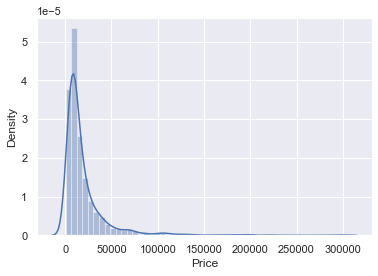

In [59]:
sns.distplot(data1_no_mv["Price"])

In [60]:
q = data1_no_mv["Price"].quantile(0.99)

data_1 = data1_no_mv[data1_no_mv["Price"]<q]


<AxesSubplot:xlabel='Price', ylabel='Density'>

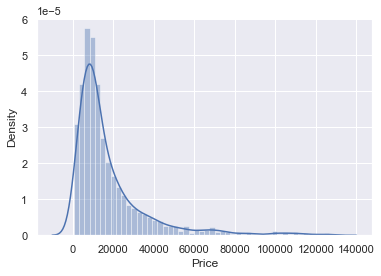

In [62]:
sns.distplot(data_1["Price"])

In [63]:
data_1.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

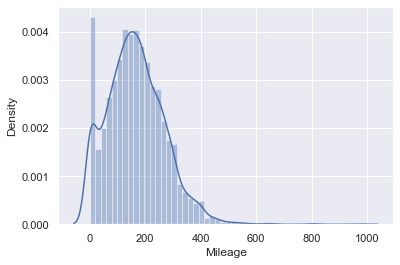

In [64]:
sns.distplot(data_1["Mileage"])

In [67]:
q = data_1["Mileage"].quantile(0.99)
data_2 =  data_1[data_1["Mileage"]<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

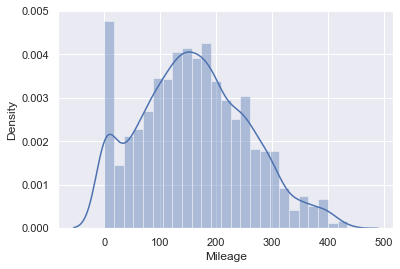

In [68]:
sns.distplot(data_2["Mileage"])

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

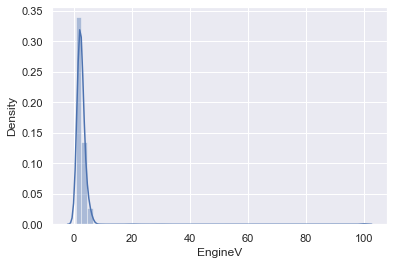

In [69]:
sns.distplot(data1_no_mv["EngineV"])

In [70]:
data_3 = data_2[data_2["EngineV"]<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

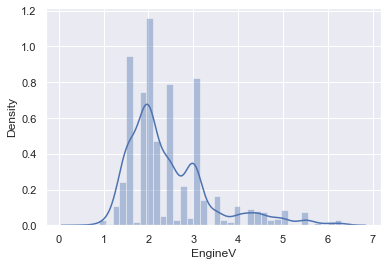

In [71]:
sns.distplot(data_3["EngineV"])

<AxesSubplot:xlabel='Year', ylabel='Density'>

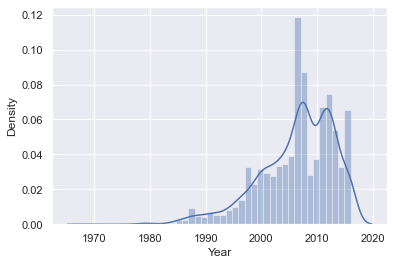

In [73]:
sns.distplot(data1_no_mv["Year"])

In [74]:
q = data_3["Year"].quantile(0.01)
data_4 = data_3[data_3["Year"]>q]

<AxesSubplot:xlabel='Year', ylabel='Density'>

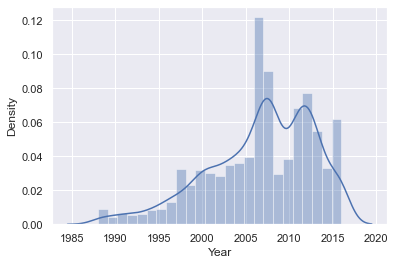

In [75]:
sns.distplot(data_4["Year"])

In [49]:
data_4.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,124,124.000000,124,124.0,124.000000,124,124,124.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,crossover,NaN,NaN,Diesel,yes,NaN
freq,40,NaN,70,NaN,NaN,87,124,NaN
mean,NaN,61482.861129,NaN,0.0,2.396855,NaN,NaN,2015.911290
std,NaN,34420.216579,NaN,0.0,0.783788,NaN,NaN,0.285478
min,NaN,11403.990000,NaN,0.0,1.200000,NaN,NaN,2015.000000
25%,NaN,28978.260000,NaN,0.0,1.950000,NaN,NaN,2016.000000
50%,NaN,62999.500000,NaN,0.0,2.200000,NaN,NaN,2016.000000
75%,NaN,99000.000000,NaN,0.0,3.000000,NaN,NaN,2016.000000


<AxesSubplot:xlabel='Year', ylabel='Density'>

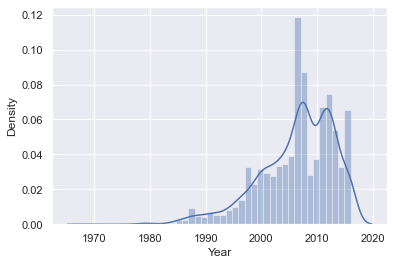

In [51]:
sns.distplot(data1_no_mv["Year"])

In [78]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


### OLS Assumptions

In [ ]:
# Linearity check b/w independent and target

<AxesSubplot:xlabel='Mileage', ylabel='Price'>

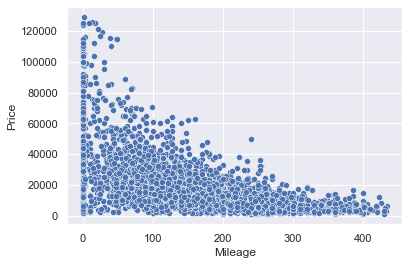

In [85]:
sns.scatterplot(data_cleaned["Mileage"],data_cleaned["Price"])

In [86]:
data_cleaned["Log Price"] = np.log(data_cleaned["Price"])

<AxesSubplot:xlabel='Mileage', ylabel='Log Price'>

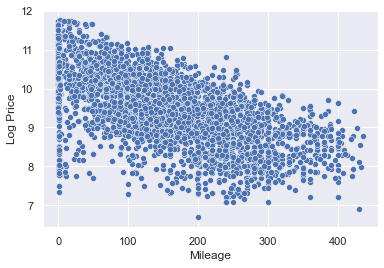

In [88]:
sns.scatterplot(data_cleaned["Mileage"],data_cleaned["Log Price"])

<AxesSubplot:xlabel='EngineV', ylabel='Log Price'>

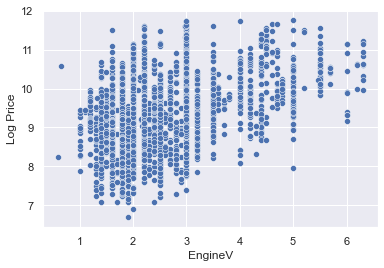

In [89]:
sns.scatterplot(data_cleaned["EngineV"],data_cleaned["Log Price"])

<AxesSubplot:xlabel='Year', ylabel='Log Price'>

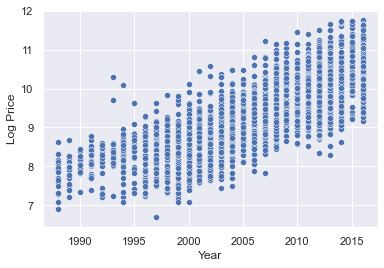

In [90]:
sns.scatterplot(data_cleaned["Year"],data_cleaned["Log Price"])

In [92]:
data_new=data_cleaned.drop("Price",axis=1) #dropping since we generated linear relation with log price

In [ ]:
# Check for multicollinearity

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var = data_new[["Mileage","Year","EngineV"]]
for i in range(len(var.columns)):
    print(variance_inflation_factor(var.values,i),var.columns[i]) #VIF

3.7915836908224834 Mileage
10.35485444268895 Year
7.662067874651502 EngineV


In [108]:
data_now = data_new.drop("Year",axis=1)

In [ ]:
## Creating dummy variables

In [109]:
data_now = pd.get_dummies(data_now,drop_first=True)

In [110]:
data_now

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [113]:
data_p1= data_cleaned[["Brand","Body","Engine Type","Registration"]]

In [114]:
data_dummies = pd.get_dummies(data_p1)

In [118]:
data_dummies.values

array([[0, 1, 0, ..., 1, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 0, 0, 1],
       [0, 1, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=uint8)

In [115]:
for i in range(len(data_dummies.columns)):
    print(variance_inflation_factor(data_dummies.values,i),data_dummies.columns[i])

inf Brand_Audi
inf Brand_BMW
inf Brand_Mercedes-Benz
inf Brand_Mitsubishi
inf Brand_Renault
inf Brand_Toyota
inf Brand_Volkswagen
inf Body_crossover
inf Body_hatch
inf Body_other
inf Body_sedan
inf Body_vagon
inf Body_van
inf Engine Type_Diesel
inf Engine Type_Gas
inf Engine Type_Other
inf Engine Type_Petrol
inf Registration_no
inf Registration_yes


In [ ]:
### Inference should always set drop first true when creating dummy variables

In [119]:
data_no_dummies = data_dummies = pd.get_dummies(data_p1,drop_first=True)

In [120]:
for i in range(len(data_no_dummies.columns)):
    print(variance_inflation_factor(data_no_dummies.values,i),data_no_dummies.columns[i])

0.3477254429122299 Brand_BMW
0.7745680706268344 Brand_Mercedes-Benz
0.24403644882358067 Brand_Mitsubishi
0.8461375538591774 Brand_Renault
0.9798499405961838 Brand_Toyota
0.25904567109462484 Brand_Volkswagen
1.3657111759482914 Body_hatch
0.4435447577161971 Body_other
0.33679304111027 Body_sedan
0.4202457748587448 Body_vagon
0.3428882164281825 Body_van
0.16104554604953092 Engine Type_Gas
1.0798903957675627 Engine Type_Other
0.19830809083003867 Engine Type_Petrol
0.3847162057081985 Registration_yes


In [130]:
data_now.columns
cols=['Log Price','Mileage', 'EngineV','Brand_BMW', 'Brand_Mercedes-Benz',
       'Brand_Mitsubishi', 'Brand_Renault', 'Brand_Toyota', 'Brand_Volkswagen',
       'Body_hatch', 'Body_other', 'Body_sedan', 'Body_vagon', 'Body_van',
       'Engine Type_Gas', 'Engine Type_Other', 'Engine Type_Petrol',
       'Registration_yes']


In [131]:
data_preprocessed = data_now[cols]

In [132]:
data_preprocessed

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


## Linear regression model

In [133]:
# declaring input variables (independent variables )
y = data_preprocessed["Log Price"]
x = data_preprocessed.drop("Log Price",axis=1)

In [134]:
## scaling the data
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler.fit(x)

StandardScaler()

In [135]:
x_scaled = scaler.transform(x)

In [ ]:
## Train test split

In [215]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y =  train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [ ]:
## creating regression

In [216]:
reg =  LinearRegression()
reg.fit(train_x,train_y)  

LinearRegression()

In [217]:
y_hat =reg.predict(train_x)        #y_hat is predicted values of x

<AxesSubplot:xlabel='Log Price'>

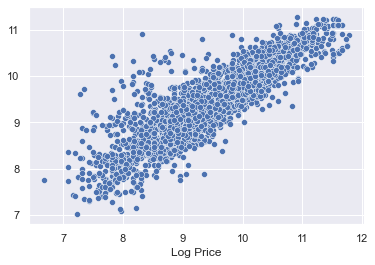

In [218]:
sns.scatterplot(train_y,y_hat)

In [ ]:
## Residual plot

<AxesSubplot:xlabel='Log Price', ylabel='Density'>

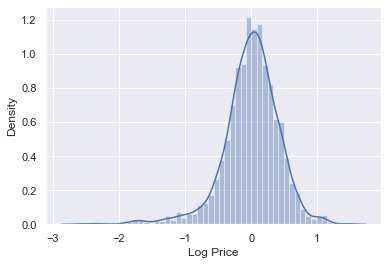

In [219]:
sns.distplot(train_y-y_hat)

In [ ]:
# normally distributed
# mean = 0
# 

In [ ]:
## Calculating rsquare

In [220]:
r2 = reg.score(train_x,train_y)
r2

0.7546487921881218

In [ ]:
## Finding bias and weights

In [221]:
# Bias
reg.intercept_

9.421003614148074

In [222]:
#Weights
reg.coef_

array([-0.46815598,  0.21526817,  0.01105151,  0.00569157, -0.14247174,
       -0.18769337, -0.06529696, -0.09898873, -0.13980763, -0.09384461,
       -0.17892753, -0.11457574, -0.15668036, -0.11685263, -0.02572253,
       -0.15106183,  0.31442123])

In [223]:
summary = pd.DataFrame(x.columns,columns=["Features"])
summary["weights"] = reg.coef_
summary

,Features,weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


In [ ]:
## For dummy variables the missing column is the benchmark

In [224]:
data_cleaned["Brand"].unique()  #Benchmark is Audi

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [225]:
data_cleaned["Engine Type"].unique()  #benchmark is Diesel

array(['Petrol', 'Diesel', 'Gas', 'Other'], dtype=object)

In [226]:
data_cleaned["Body"].unique()        #Benchmark is crossover

array(['sedan', 'van', 'crossover', 'vagon', 'other', 'hatch'],
      dtype=object)

In [ ]:
# If the weight is positive it is more than(here price is more) the benchmark and if it is negative it is less than the benchmark
# Only for dummy features

In [ ]:
# Testing

In [227]:
y_hat_test = reg.predict(test_x)

<AxesSubplot:xlabel='Log Price'>

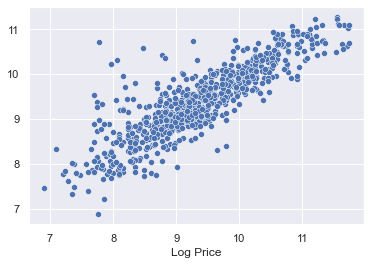

In [228]:
sns.scatterplot(test_y,y_hat_test)

In [229]:
df_pf =  pd.DataFrame(np.exp(y_hat_test),columns=["Predictions"]) # converting log to exp to get original price
df_pf

,Predictions
0,40419.308971
1,7956.895960
2,5757.284408
3,9765.810605
4,7027.363814
...,...
769,4699.586013
770,9123.067372
771,6267.803094
772,20906.128600


In [230]:
test_y = test_y.reset_index(drop=True)

In [231]:
df_pf["Target"] = np.exp(test_y) 

In [232]:
df_pf

,Predictions,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0
...,...,...
769,4699.586013,4200.0
770,9123.067372,8800.0
771,6267.803094,4850.0
772,20906.128600,27000.0


In [233]:
df_pf["Residuals"] = df_pf["Target"] - df_pf["Predictions"]

In [234]:
df_pf["Percentage"] = np.absolute(df_pf["Residuals"]/df_pf["Target"]*100)

In [235]:
df_pf

,Predictions,Target,Residuals,Percentage
0,40419.308971,21300.0,-19119.308971,89.762014
1,7956.895960,8900.0,943.104040,10.596675
2,5757.284408,3250.0,-2507.284408,77.147213
3,9765.810605,12000.0,2234.189395,18.618245
4,7027.363814,5400.0,-1627.363814,30.136367
...,...,...,...,...
769,4699.586013,4200.0,-499.586013,11.894905
770,9123.067372,8800.0,-323.067372,3.671220
771,6267.803094,4850.0,-1417.803094,29.233053
772,20906.128600,27000.0,6093.871400,22.569894


In [236]:
df_pf.describe()

,Predictions,Target,Residuals,Percentage
count,774.000000,774.000000,774.000000,774.000000
mean,16113.011638,17799.988992,1686.977355,42.085282
std,13326.229797,19723.434542,11192.614496,96.169928
min,967.030415,999.000000,-42859.020603,0.020246
25%,7467.591694,6700.000000,-2246.354353,11.024941
50%,11914.358989,11050.000000,-38.697776,24.086183
75%,20249.505640,20475.000000,3004.524837,42.381716
max,79026.348020,125000.000000,81051.158885,1785.792525
